# 3. Funktionen

## Inhalt

- Aufbau einer Funktion
- Imports
- Verwenden von Funktionen
    - Öffnen von Dateien
    - Schreiben von Dateien
    - Verwendung des with-Operators
- CSV-Dateien einlesen -> in Listen übertragen
- matplotlib + csv

## Aufbau einer Funktion


In [1]:
def hello_world():
    print("Hello World!")

In [2]:
hello_world()

Hello World!


In [3]:
def hello_name(name):
    print("Hello " + name + "!")

In [4]:
hello_name("Max")

Hello Max!


In [5]:
def maximum(number_1, number_2):
    if number_1 > number_2:
        return number_1
    else:
        return number_2

In [6]:
maximum(2, 3)

3

In [7]:
def two():
    return 1, 2

a, b = two()
c = two()

print(a)
print(b)
print(c)

1
2
(1, 2)


## Rekursion

- Funktionen, die im Funktionsrumpf sich selbst aufrufen

Wie wird die Fakultät berechnet?

3! = 3 * 2 * 1

5! = 5 * 4 * 3 * 2 * 1

In [1]:
def fak(n):
    if n == 0:
        return 1
    else:
        return n * fak(n - 1)

In [3]:
fak(5)

120

Fibonacci:

- fib(n) = fib(n - 1) + fib(n - 2)
- fib(1) = 1
- fib(2) = 1

In [5]:
fib(7)

13

## Arbeit mit Daten

- die meisten Programme sind ohne Ein- und Ausgabe von Daten nutzlos
- verschiedene Möglichkeiten:
    - Datenbank
    - REST-Services
    - User-Input
    - Dateien
- in diesem Abschnitt wollen wir mit CSV-Dateien arbeiten
    - menschenlesbar
    - geringer Speicher-Overhead

### Dateien öffnen

In [8]:
file = open("students.csv", "r")

In [9]:
for line in file:
    print(line)

Student,Age

Eric,18

Max,18

Roy,19

Ronja,20

Ronny,19


In [10]:
print("Te\nst")

Te
st


In [11]:
file = open("students.csv", "r")
for line in file:
    print(line.encode())

b'Student,Age\n'
b'Eric,18\n'
b'Max,18\n'
b'Roy,19\n'
b'Ronja,20\n'
b'Ronny,19'


In [12]:
file = open("students.csv", "r")
for line in file:
    print(line.strip())

Student,Age
Eric,18
Max,18
Roy,19
Ronja,20
Ronny,19


In [13]:
for line in file:
    print(line.strip())

In [14]:
print(file)

<_io.TextIOWrapper name='students.csv' mode='r' encoding='UTF-8'>


In [15]:
file.seek(0)

for line in file:
    print(line.strip())

Student,Age
Eric,18
Max,18
Roy,19
Ronja,20
Ronny,19


### Datei schreiben

In [16]:
file = open("test.txt", "w")

file.write("Hello World")
file.write("Hello World")

file.close()

In [17]:
file = open("test.txt", "w")

file.write("Hello World\n")
file.write("Hello World")

file.close()

In [18]:
students = ["Roy", "Ronny", "Ronja", "Max", "Erik"]

file = open("test.txt", "w")

for student in students:
    file.write(student + "," + str(len(student)) + "\n")

file.close()

In [19]:
file = open("test.txt", "a")

file.write("PS: ENDE")

file.close()

### with-Konstrukt

In [20]:
with open("students.csv", "r") as file:
    for line in file:
        print(line.strip())

Student,Age
Eric,18
Max,18
Roy,19
Ronja,20
Ronny,19


In [21]:
for line in file:
    print(line.strip())

ValueError: I/O operation on closed file.

### Arbeit mit csv-Dateien

In [22]:
with open("students.csv", "r") as file:
    for line in file:
        print(line.strip().split(","))

['Student', 'Age']
['Eric', '18']
['Max', '18']
['Roy', '19']
['Ronja', '20']
['Ronny', '19']


In [23]:
with open("students.csv", "r") as file:
    for line in file:
        data = line.strip().split(",")
        if data[1] == "18":
            print(data[0] + ": " + data[1])

Eric: 18
Max: 18


### Grafiken zeichnen

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = [19, 10]

In [55]:
x = [i for i in range(5)]
y = [random.random() * 9 + 1 for i in range(5)]

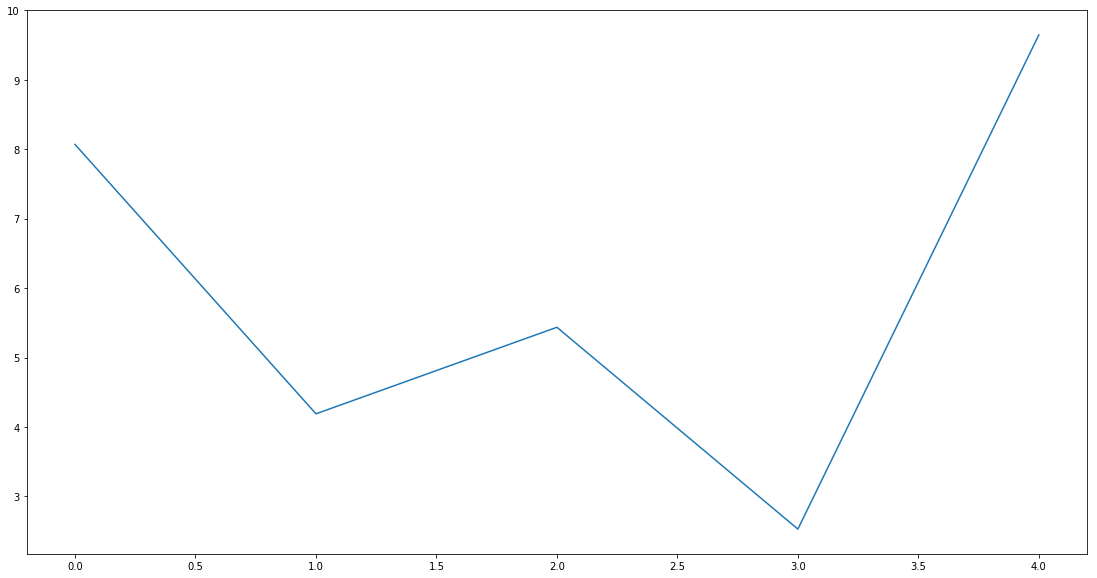

In [56]:
plt.plot(x, y)
plt.show()

In [57]:
student = []
age = []

with open("students.csv", "r") as file:
    for line in file:
        if "Age" in line:
            continue
        
        data = line.strip().split(",")
        
        student.append(data[0])
        age.append(int(data[1]))

print(student)
print(age)

['Eric', 'Max', 'Roy', 'Ronja', 'Ronny']
[18, 18, 19, 20, 19]


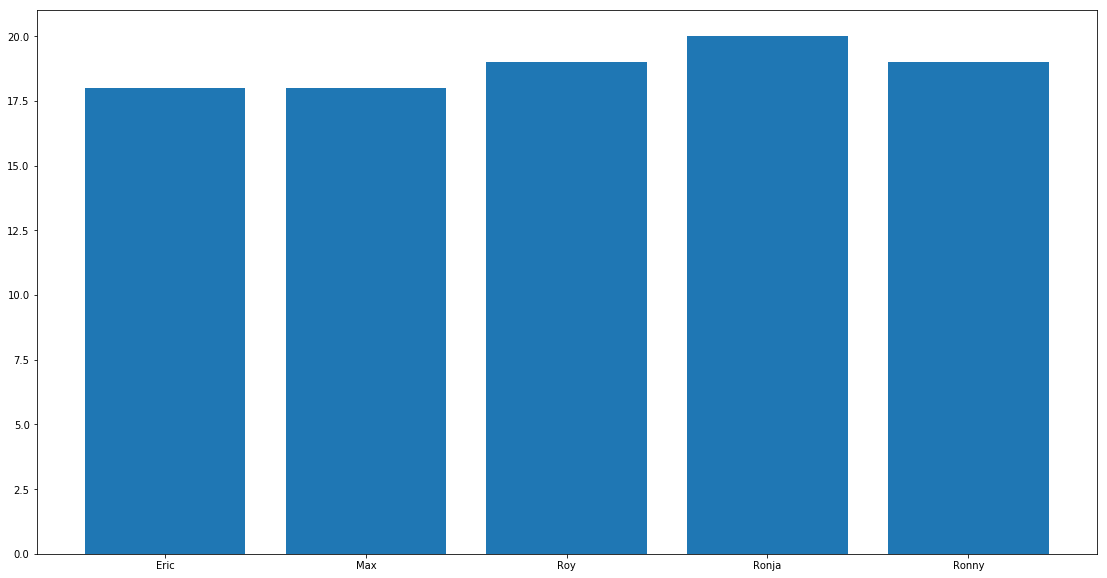

In [58]:
plt.bar(student, age)
plt.show()

- https://www.kaggle.com/kaggle/us-baby-names

In [59]:
count = 0

with open("../python_vorkurs_data/StateNames.csv", "r") as file:
    for line in file:
        if count == 5:
            continue
        
        print(line.strip())
        
        count = count + 1

Id,Name,Year,Gender,State,Count
1,Mary,1910,F,AK,14
2,Annie,1910,F,AK,12
3,Anna,1910,F,AK,10
4,Margaret,1910,F,AK,8


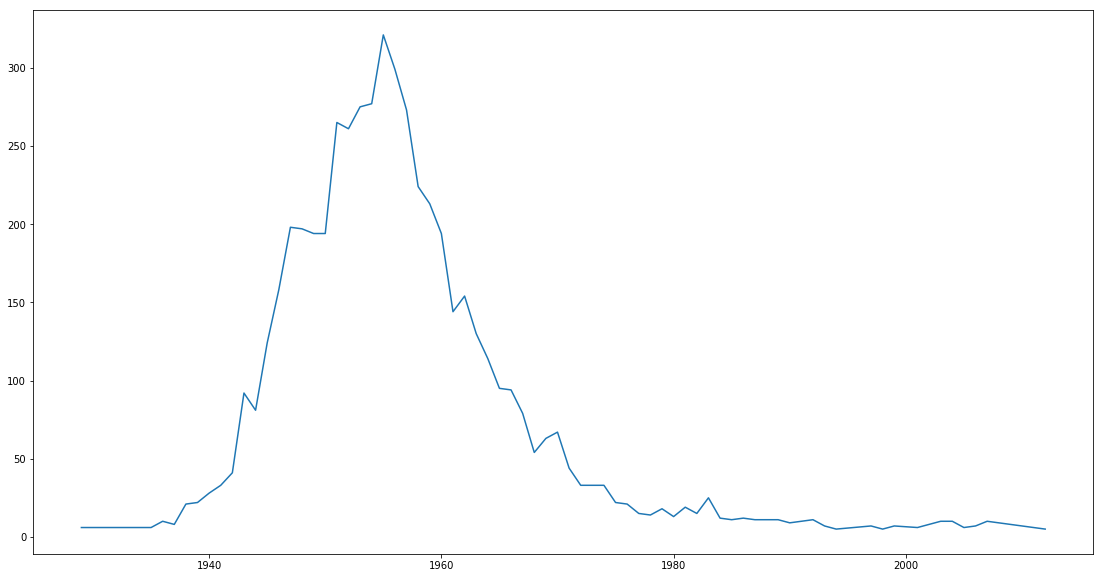

In [60]:
name = "Diane"

state = "NC"

x = []
y = []

with open("../python_vorkurs_data/StateNames.csv", "r") as file:
    for line in file:
        data = line.strip().split(",")
        
        if data[4] == state and data[1] == name:
            x.append(int(data[2]))
            y.append(int(data[5]))
            
plt.plot(x, y)

In [61]:
plt.show()

In [62]:
plt.close()

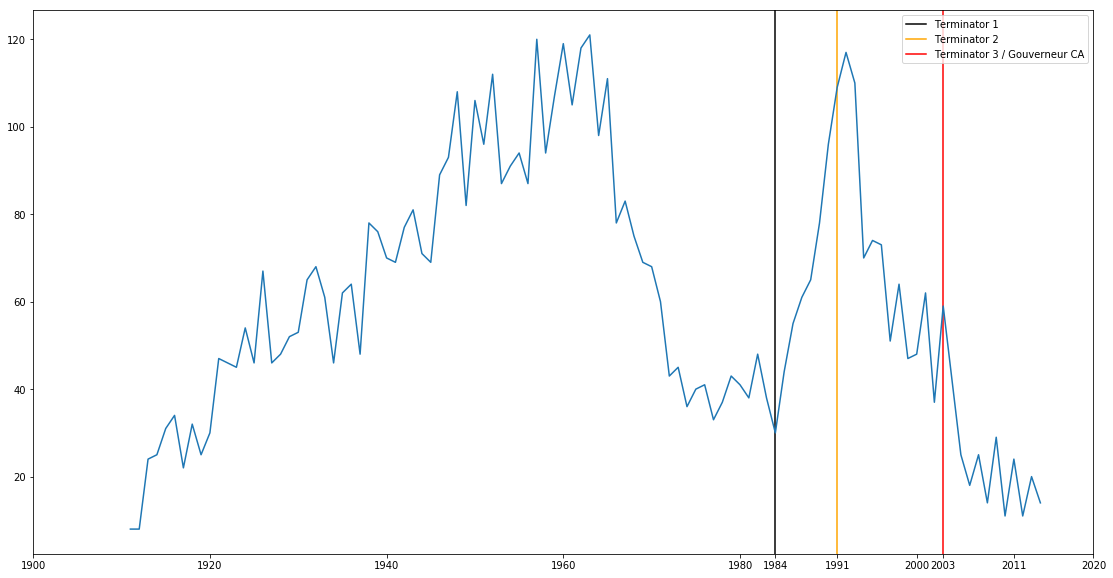

In [63]:
name = "Arnold"

state = "CA"

x = []
y = []

with open("../python_vorkurs_data/StateNames.csv", "r") as file:
    for line in file:
        data = line.strip().split(",")
        
        if data[4] == state and data[1] == name:
            x.append(int(data[2]))
            y.append(int(data[5]))

plt.axvline(1984, color="black", label="Terminator 1")
plt.axvline(1991, color="orange", label="Terminator 2")
plt.axvline(2003, color="red", label="Terminator 3 / Gouverneur CA")
plt.plot(x, y)
extraticks = [1984, 1991, 2003, 2011]
plt.xticks(list(plt.xticks()[0]) + extraticks)
plt.legend(loc='upper right')
plt.show()

In [64]:
name1 = "Diana"
name2 = "Diane"

state = "NC"

x1 = []
x2 = []
y1 = []
y2 = []

with open("../python_vorkurs_data/StateNames.csv", "r") as file:
    for line in file:
        data = line.strip().split(",")
        
        if data[4] == state and data[1] == name2:
            x2.append(int(data[2]))
            y2.append(int(data[5]))
            
        if data[4] == state and data[1] == name1:
            x1.append(int(data[2]))
            y1.append(int(data[5]))

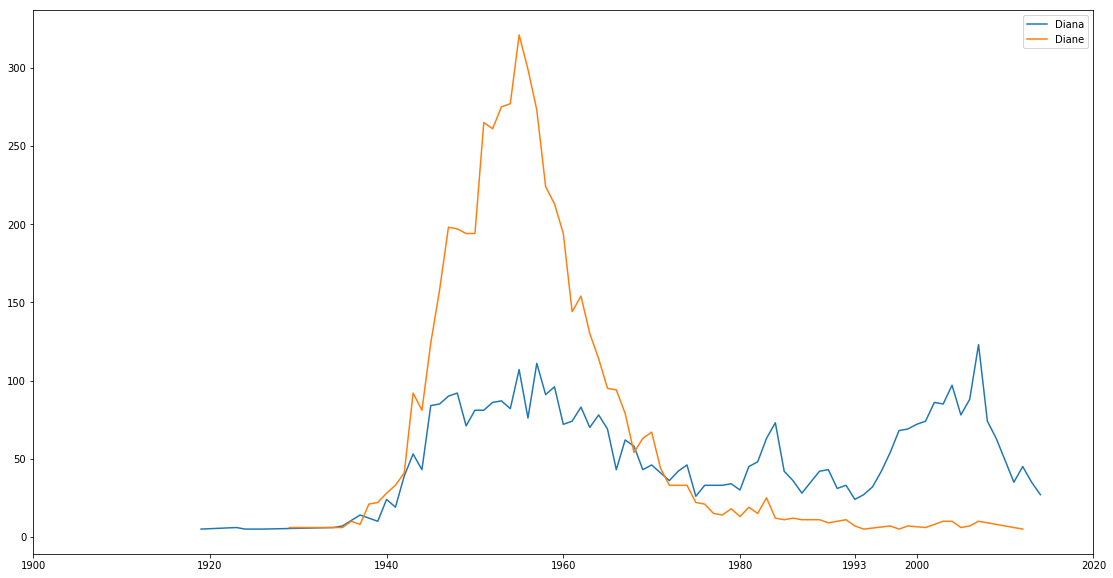

In [65]:
plt.plot(x1, y1, "-", label=name1)
plt.plot(x2, y2, "-", label=name2)
extraticks = [1993]
plt.xticks(list(plt.xticks()[0]) + extraticks)
plt.legend(loc='upper right')
plt.show()